# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [99]:
import pandas as pd
import pylab as plt
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings('ignore')

In [100]:
# df = pd.read_clipboard('|')
df = pd.read_csv('student.csv')
df.columns = [i.lower().replace(' ','') for i in df.columns]
df.head()

,studentid,age,tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4


Draw a dispersion diagram (scatter plot) for the data.

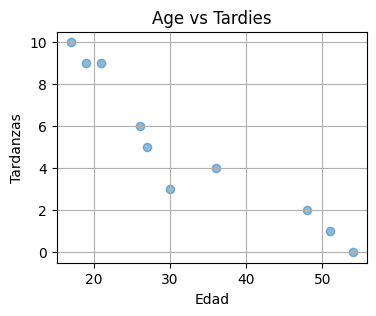

In [101]:
x = df.age
y = df.tardies

plt.figure(figsize=(4, 3))
plt.scatter(x, y, alpha=0.5)
plt.title('Age vs Tardies')
plt.xlabel('Edad')
plt.ylabel('Tardanzas')
plt.grid(True)
plt.show();

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?


Se ve una clara tendencia descendente respecto a la edad y las tardanzas. Es decir, a medida que aumenta la edad las tardanzas parecen disminuir. Parece que en este scatter se podría dibujar una linea perpendicular descendente.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [102]:
df['age'].cov(df['tardies'])

'''
Debido a que la covarianza es negativa vemos que a medida que "age" drecrece aumenta el número de faltas.
Pero, la magnitud del número no demuestra la fuerza de la relación.
'''

'\nDebido a que la covarianza es negativa vemos que a medida que "age" drecrece aumenta el número de faltas.\nPero, la magnitud del número no demuestra la fuerza de la relación.\n'

In [103]:
df['age'].corr(df['tardies'])

'''
Indica la magnitud, la fuerza de la relación.
Debido a que es muy cercana a -1 podemos afirmar que existe una intensa fuerza relación lineal
'''

'\nIndica la magnitud, la fuerza de la relación.\nDebido a que es muy cercana a -1 podemos afirmar que existe una intensa fuerza relación lineal\n'

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [104]:
# Lógica: predecimos el número de tardanzas en base a la edad
x = sm.add_constant(df.age) # Variable que la que creemos que depende

y = df.tardies # Variable que queremos predecir

modelo = sm.OLS(y, x).fit()

y_pred = modelo.predict(x)

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           5.57e-05
Time:                        15:05:12   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.000      10.328      15.450
age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

'''
Nuestro modelo de regresión lineal nos devuelve lo siguiente:

R-squared: el 88.2% de la variación en 'tardies' lo explica la variable 'age'

Adj. R-squared: lo mismo pero ajustada al número de elementos

F-statistic: índica la significancía del modelo (si es correcto) 60% sugiere que nuestro modelo explica significativamente la variación en las variables.

Prob (F-statistic): el p_valor de fstat, nos vuelve a indicar que el modelo es estadísticamente significativo

En base a los estadísticos obtenidos podemos considerar que nuestro modelo puede predecir con cierto margen de error el número de tardanzas según la edad
'''

Plot your regression model on your scatter plot.

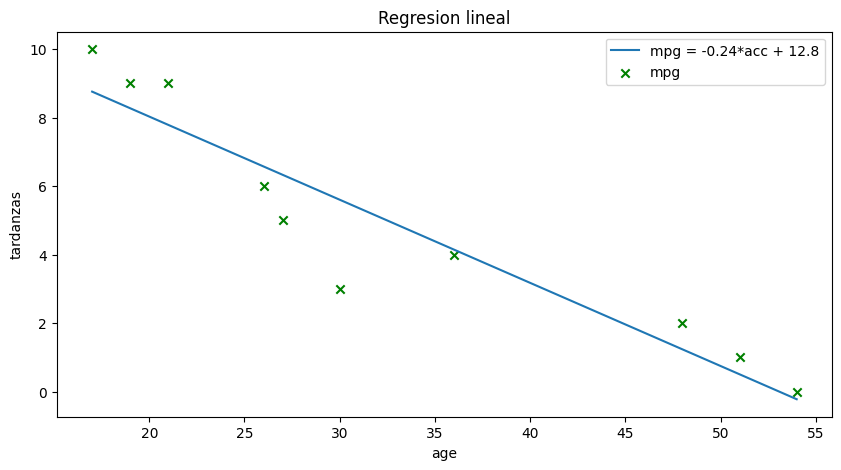

In [105]:
x=np.linspace(df.age.min(), df.age.max(), 5)

y= -0.2428 *x + 12.8888   # y = mx + b

plt.figure(figsize=(10, 5))

# la linea que cruza
plt.plot(x, y, label='mpg = -0.24*acc + 12.8')

# los datos
plt.scatter(df.age, df.tardies, marker='x', c='g', label='mpg')


plt.title('Regresion lineal')
plt.xlabel('age')
plt.ylabel('tardanzas')
plt.legend()
plt.show();

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

# Análisis

Tanto a través de los resultados antes presentados cómo viendo el gráfico podemos concluir que nuestro modelo es una buena medida a la hora de definir el número de tardanzas en base a la edad. 

Nuestro modelo ha recibido pocos datos para entrenarse por lo que los resultados pueden no ser del todo correctos, sin embargo, teniendo el cuenta nuestro número de elementos parece poder predecir correctamente, con cierto margen, el número de faltas que tendrá un alumno en base a su edad.

Nuestra conclusión en base a los resultados del modelo es que cuanto más jóvenes son los alumnos más número de tardanzas tienen.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [106]:
df = pd.read_csv('vehicles.csv',)
df.columns = [i.lower().replace(' ', '_') for i in df.columns]

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [116]:
df = df[['year', 'cylinders', 'fuel_barrels/year', 'combined_mpg', 'fuel_cost/year', 'co2_emission_grams/mile']]
df.head()

,year,cylinders,fuel_barrels/year,combined_mpg,fuel_cost/year,co2_emission_grams/mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500


In [122]:
df.corr()['co2_emission_grams/mile'][:5] # segmentamos para sacar la co2 con co2 porque obvio es 1

year                -0.222300
cylinders            0.752393
fuel_barrels/year    0.986189
combined_mpg        -0.926229
fuel_cost/year       0.930865
Name: co2_emission_grams/mile, dtype: float64

Vemos que las columnas que casi todas las columnas tienen fuerte relación, positiva o negativa, con el número de emisiones. Parece que el año no tiene una importancia signicativa a la hora de explicar las emisiones. El número de cilindros, con corr 0.75 parece explicar la relación, sin embargo no tanto como el resto, el cual ronda el 90-98%

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [127]:
# Regresión Ordinary Least Squares (OLS) regression
x = sm.add_constant(df[['year', 'cylinders', 'fuel_barrels/year', 'combined_mpg', 'fuel_cost/year']])

y = df['co2_emission_grams/mile']

modelo = sm.OLS(y, x).fit()

y_pred = modelo.predict(x)

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     co2_emission_grams/mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                             15:15:21   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
fuel_barrels/year    19.0529      0.061    311.600      0.000      18.933      19.173
combined_mpg         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
fuel_cost/year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

# Análisis
Las R-squared nos dan un valor del 98.1%, lo que índica que, en principio, el 98% de las emisiones es explicado por el modelo. Esto sugiere un fuerte ajuste.

La F-statistic y su p_valor nos índican que este es un modelo altamente significativo.

en cuanto a los coeficientes de variables vemos que cada una explica el aumento o reducción de las emisiones en sus unidades. Las variables más importantes para el modelo parecen ser 'fuel_barrels/year' y 'combined_mpg' (coeficientes más altos).

El hecho de que los p_valores de las variables sean extremadamente bajos nos indica que todas las variables tienen una alta significancia estadística.

conclusión:

A pesar de que las variables muestran fuertes asociaciones no sería correcto inferir la causalidad únicamente a partir de un análisis de regresión. Sin embargo, la conclusión es que la confianza del modelo es relativamente alto debido a los valores R-cuadrado, a los bajos valores p y al gran tamaño de la muestra (35_952). Sin embargo, puede ser necesario realizar análisis adicionales y considerar otros factores para obtener conclusiones sólidas sobre las emisiones de CO2.

# Your response here. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [111]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [112]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [113]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [114]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [115]:
# Your response here. 